# About The Dataset

The World Happiness Report is a survey that ranks 155 countries by their happiness levels, using well-being measurements to assess national progress. Dystopia is an imaginary country created to serve as a benchmark for comparison, representing the world's least happy people. The residuals measure the extent to which the six key variables over- or under-explain average life evaluations, with an average value of zero over all countries. The columns following the Happiness Score describe the contribution of factors such as GDP per capita, family, life expectancy, freedom, generosity, and trust in government corruption to each country's happiness evaluation. The Dystopia Residual metric combines the Dystopia Happiness Score and the residual value for each country. To predict happiness scores, all factors mentioned in the dataset should be considered.

In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [1]:
# importing every requirement for the project
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# importing important models and features from sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
import warnings
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
warnings.filterwarnings('ignore')
# Random Forest Classifier usage
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
# importing significant plotly concepts and functions
import plotly
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
#permits us to use Plotly when not online
init_notebook_mode(connected=True)

import warnings 
warnings.simplefilter('ignore')
import pickle
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import pandas as pd
import ydata_profiling as pp
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [6]:
#Now that pandas liberary is available, we may read the file:
data1=pd.read_csv("happiness_score_dataset.csv")


print("Data type : ", type(data1))
print("Data dims : ", data1.shape)


Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (158, 12)


This reveals that there are 158 rows and 12 columns overall.

In [7]:
# Getting a summary of the file
data1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


The goal label in this case is the Happiness score, while the remaining columns provide the information that will help forecast the label.

The categories columns, on the other hand, seem to be playing no significant role in the calculation of the Happiness Score to me because the Happiness Rank is merely a list of numbers. We will conduct more analysis to determine whether or not my suspicion is accurate, and we will eliminate any column that doesn't contribute to the label prediction.

This will be a regression challenge because our label is continuous data.

In [8]:
data1.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

It is clear from this that the Happiness Score column serves as the label or output, and the other columns contain information about the country, region, happiness rank, standard error, family, health (life expectancy), freedom, trust (government corruption), generosity, and dystopia residual.

In [9]:
data1.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

This demonstrates that none of the given dataset's columns have null values.

In [10]:
# Information about the Variables
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

The columns Country and Region in this table include categorical values that can be translated into numerical values, however we do not need to take skewness into account.

In [11]:
data1.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


By ignoring the categorical data, we can gain insights from the numerical data in this case. We can view the mean, median, min, max, count, etc.

# Eliminating categorical information that does not support label prediction

In [12]:
data1_New=data1.drop(['Country','Region','Happiness Rank'],axis=1)

Here, we used the drop command to remove the columns.

# Making the data visible:

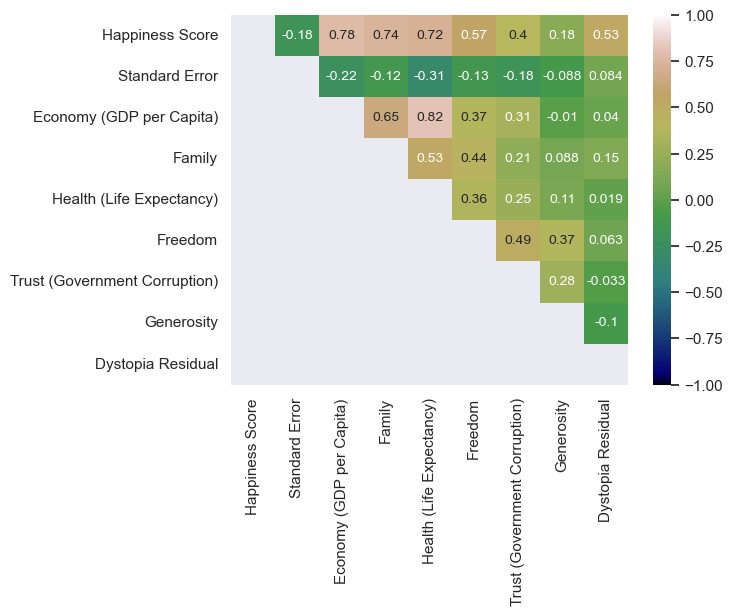

In [13]:
upper_triangel=np.tril(data1_New.corr())
sns.heatmap(data1_New.corr(),vmin=-1,vmax=1,annot=True,annot_kws={'size':10},cmap='gist_earth',mask=upper_triangel)
plt.show()

We may examine the relationship between the happiness Score and other characteristic columns from the preceding graph. There are no dark boxes, indicating that all of these columns are somewhat influencing the label's prediction.

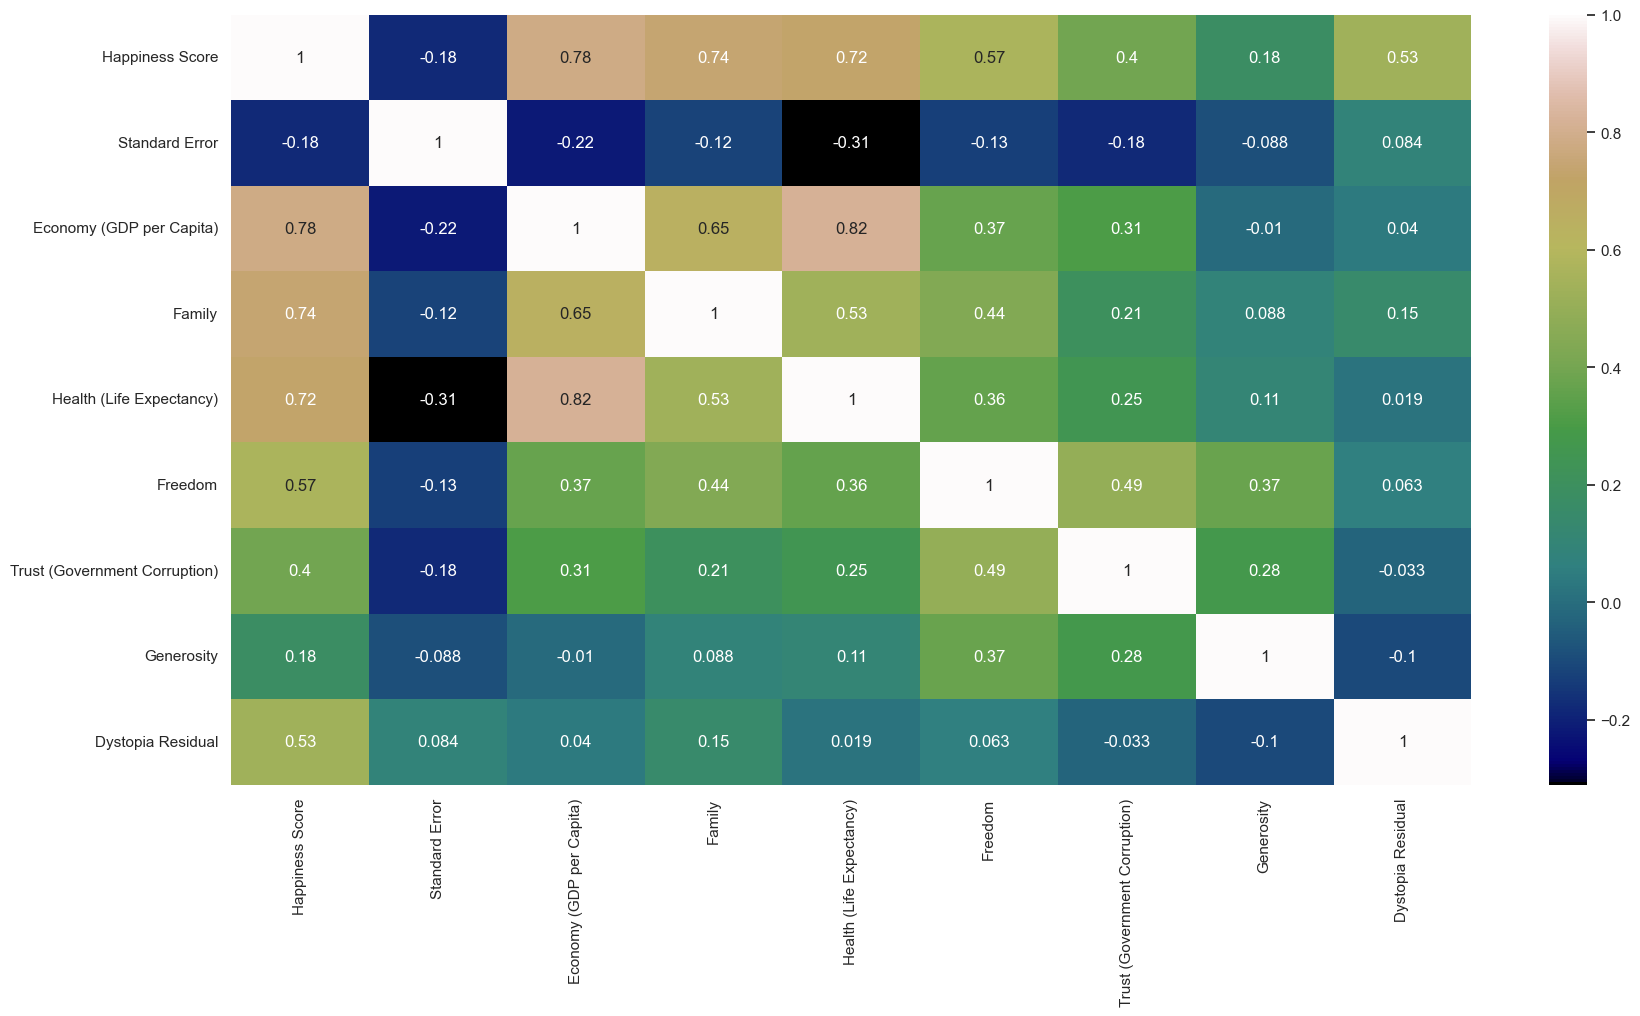

In [43]:
corr_hmap=data1_New.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_hmap,annot=True,cmap='gist_earth')
plt.show()

Observations on the heat map

1.Happiness Score's colour is dark blue, and its standard deviation shows that the two variables are adversely connected.

2.Dark black colours show that they have a strong negative correlation with one another.

3.The light colours denote the direction of the two columns' positive association.

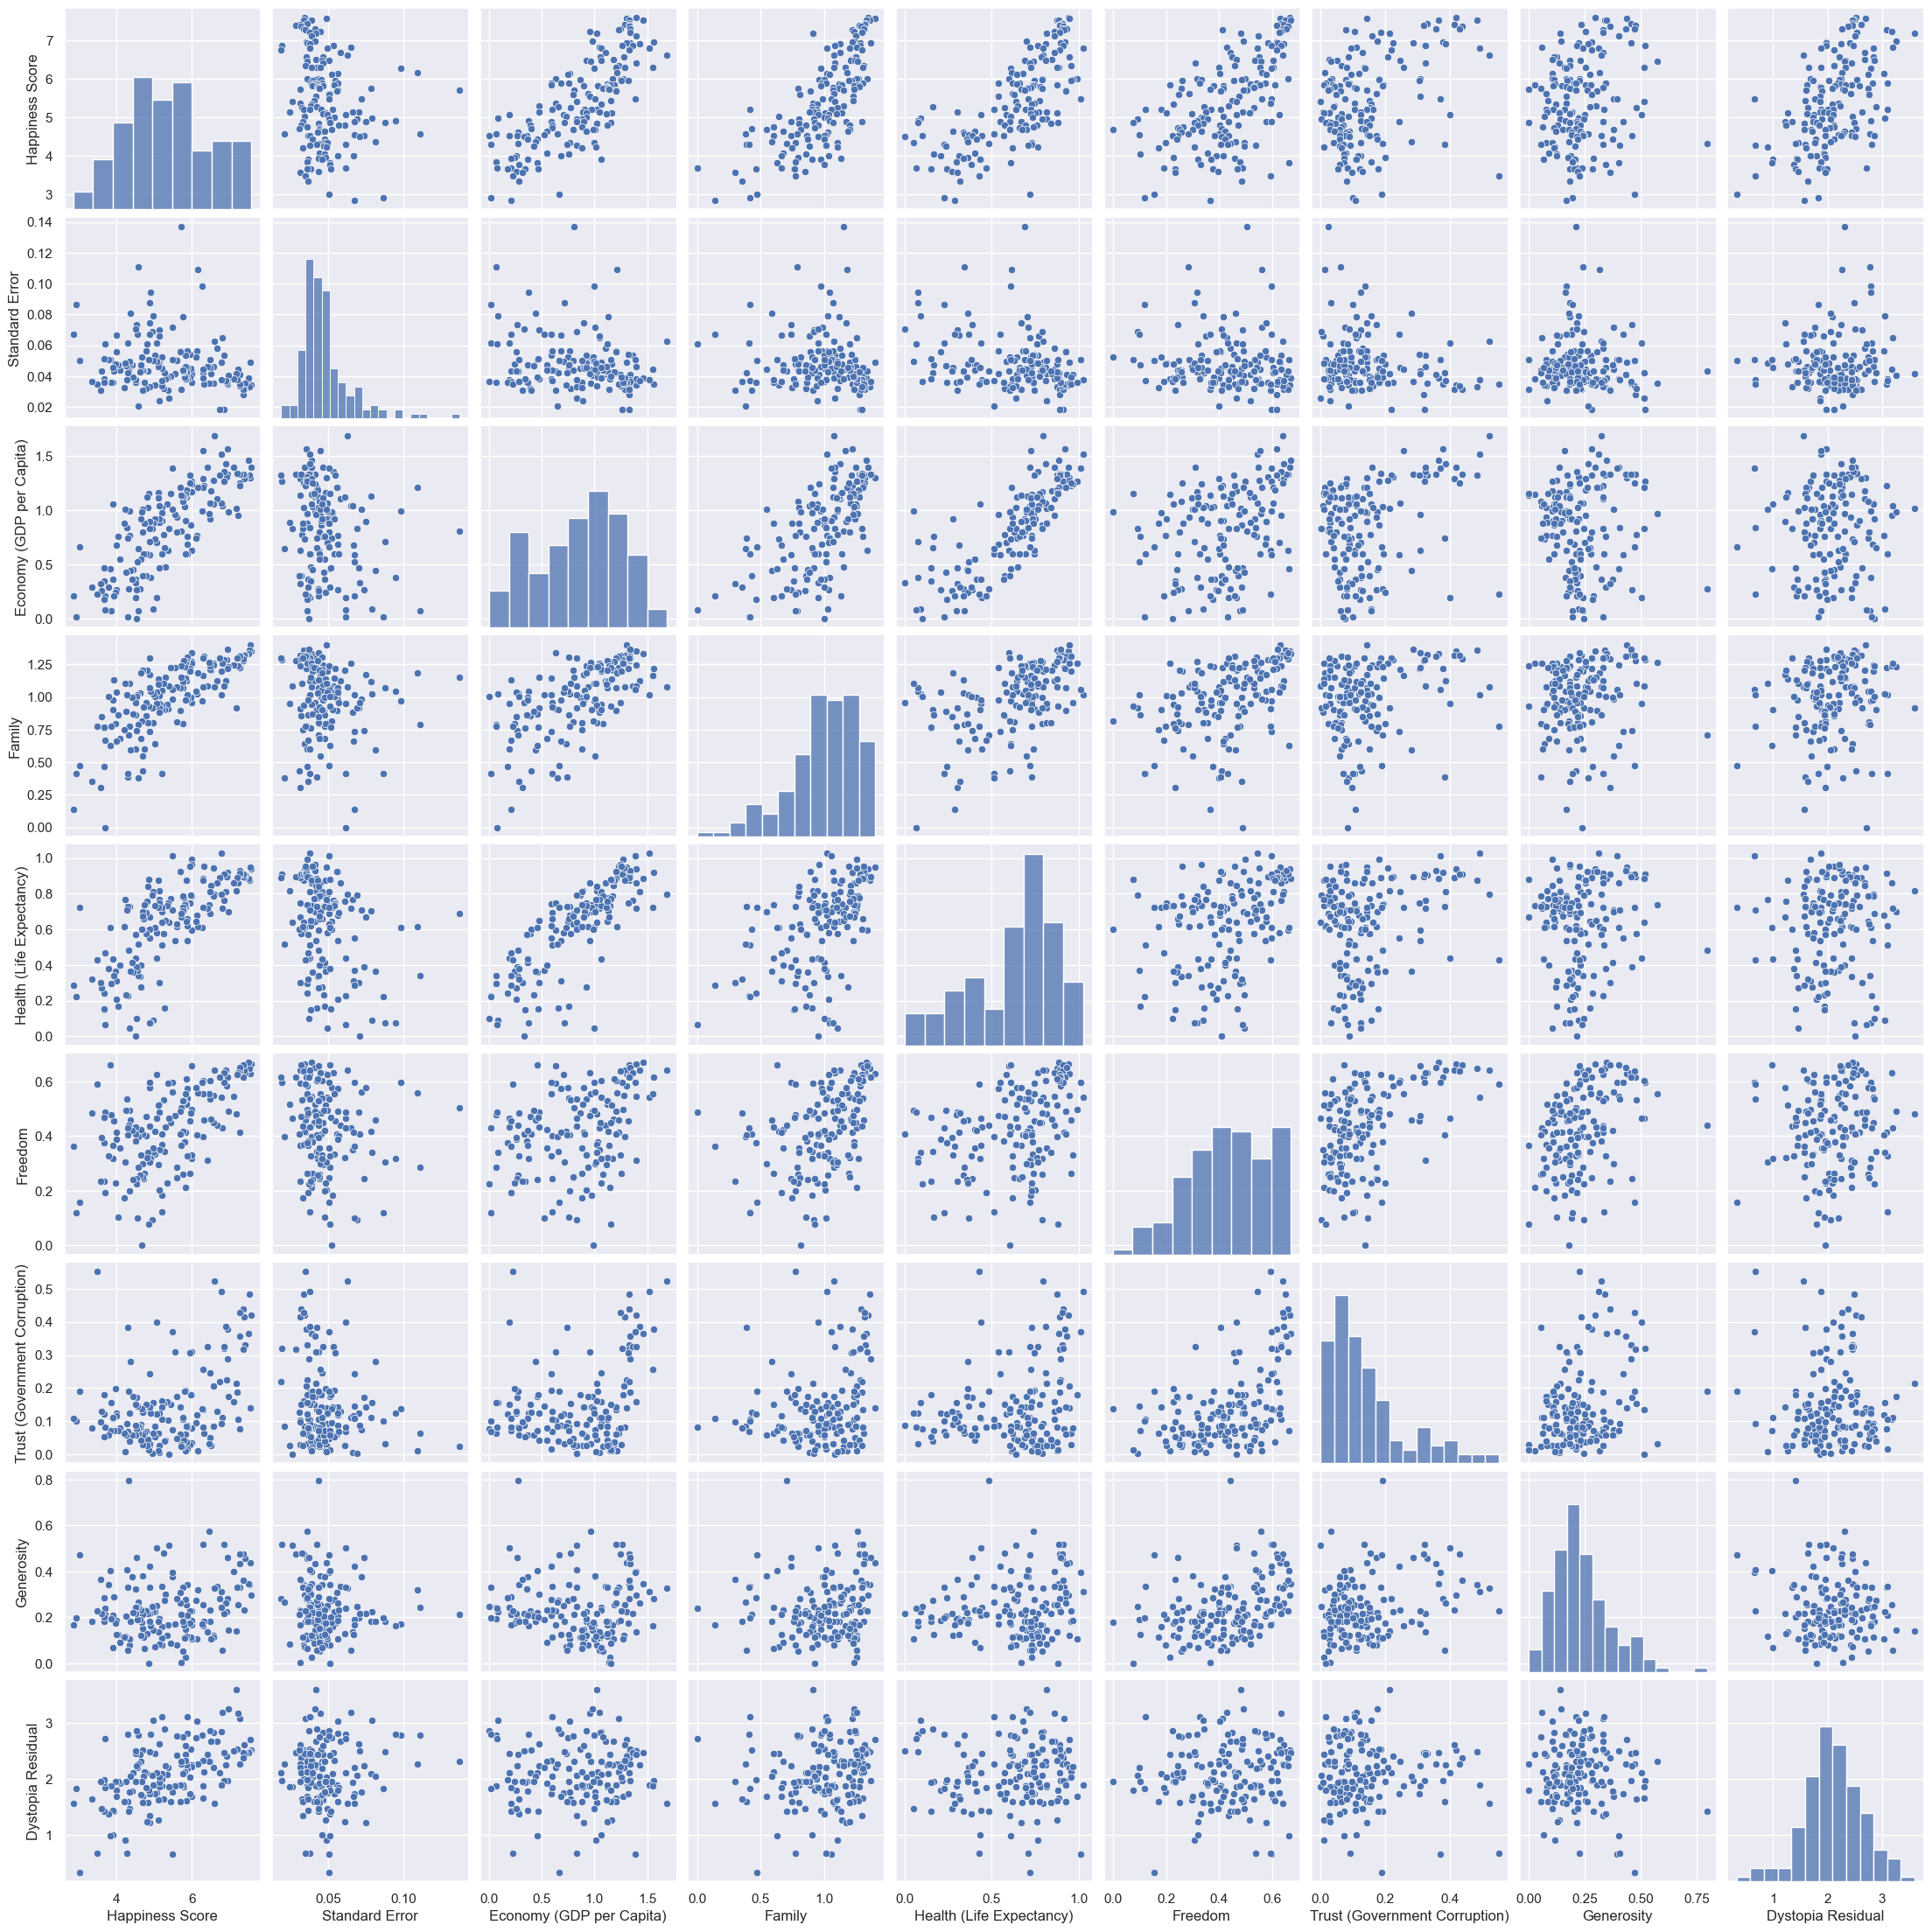

In [15]:
#The PairPlot in use:
sns.pairplot(data1_New)
plt.show()

In a pairplot, the scatter plot and histogram are used to show how the data are distributed.

# Histogram use

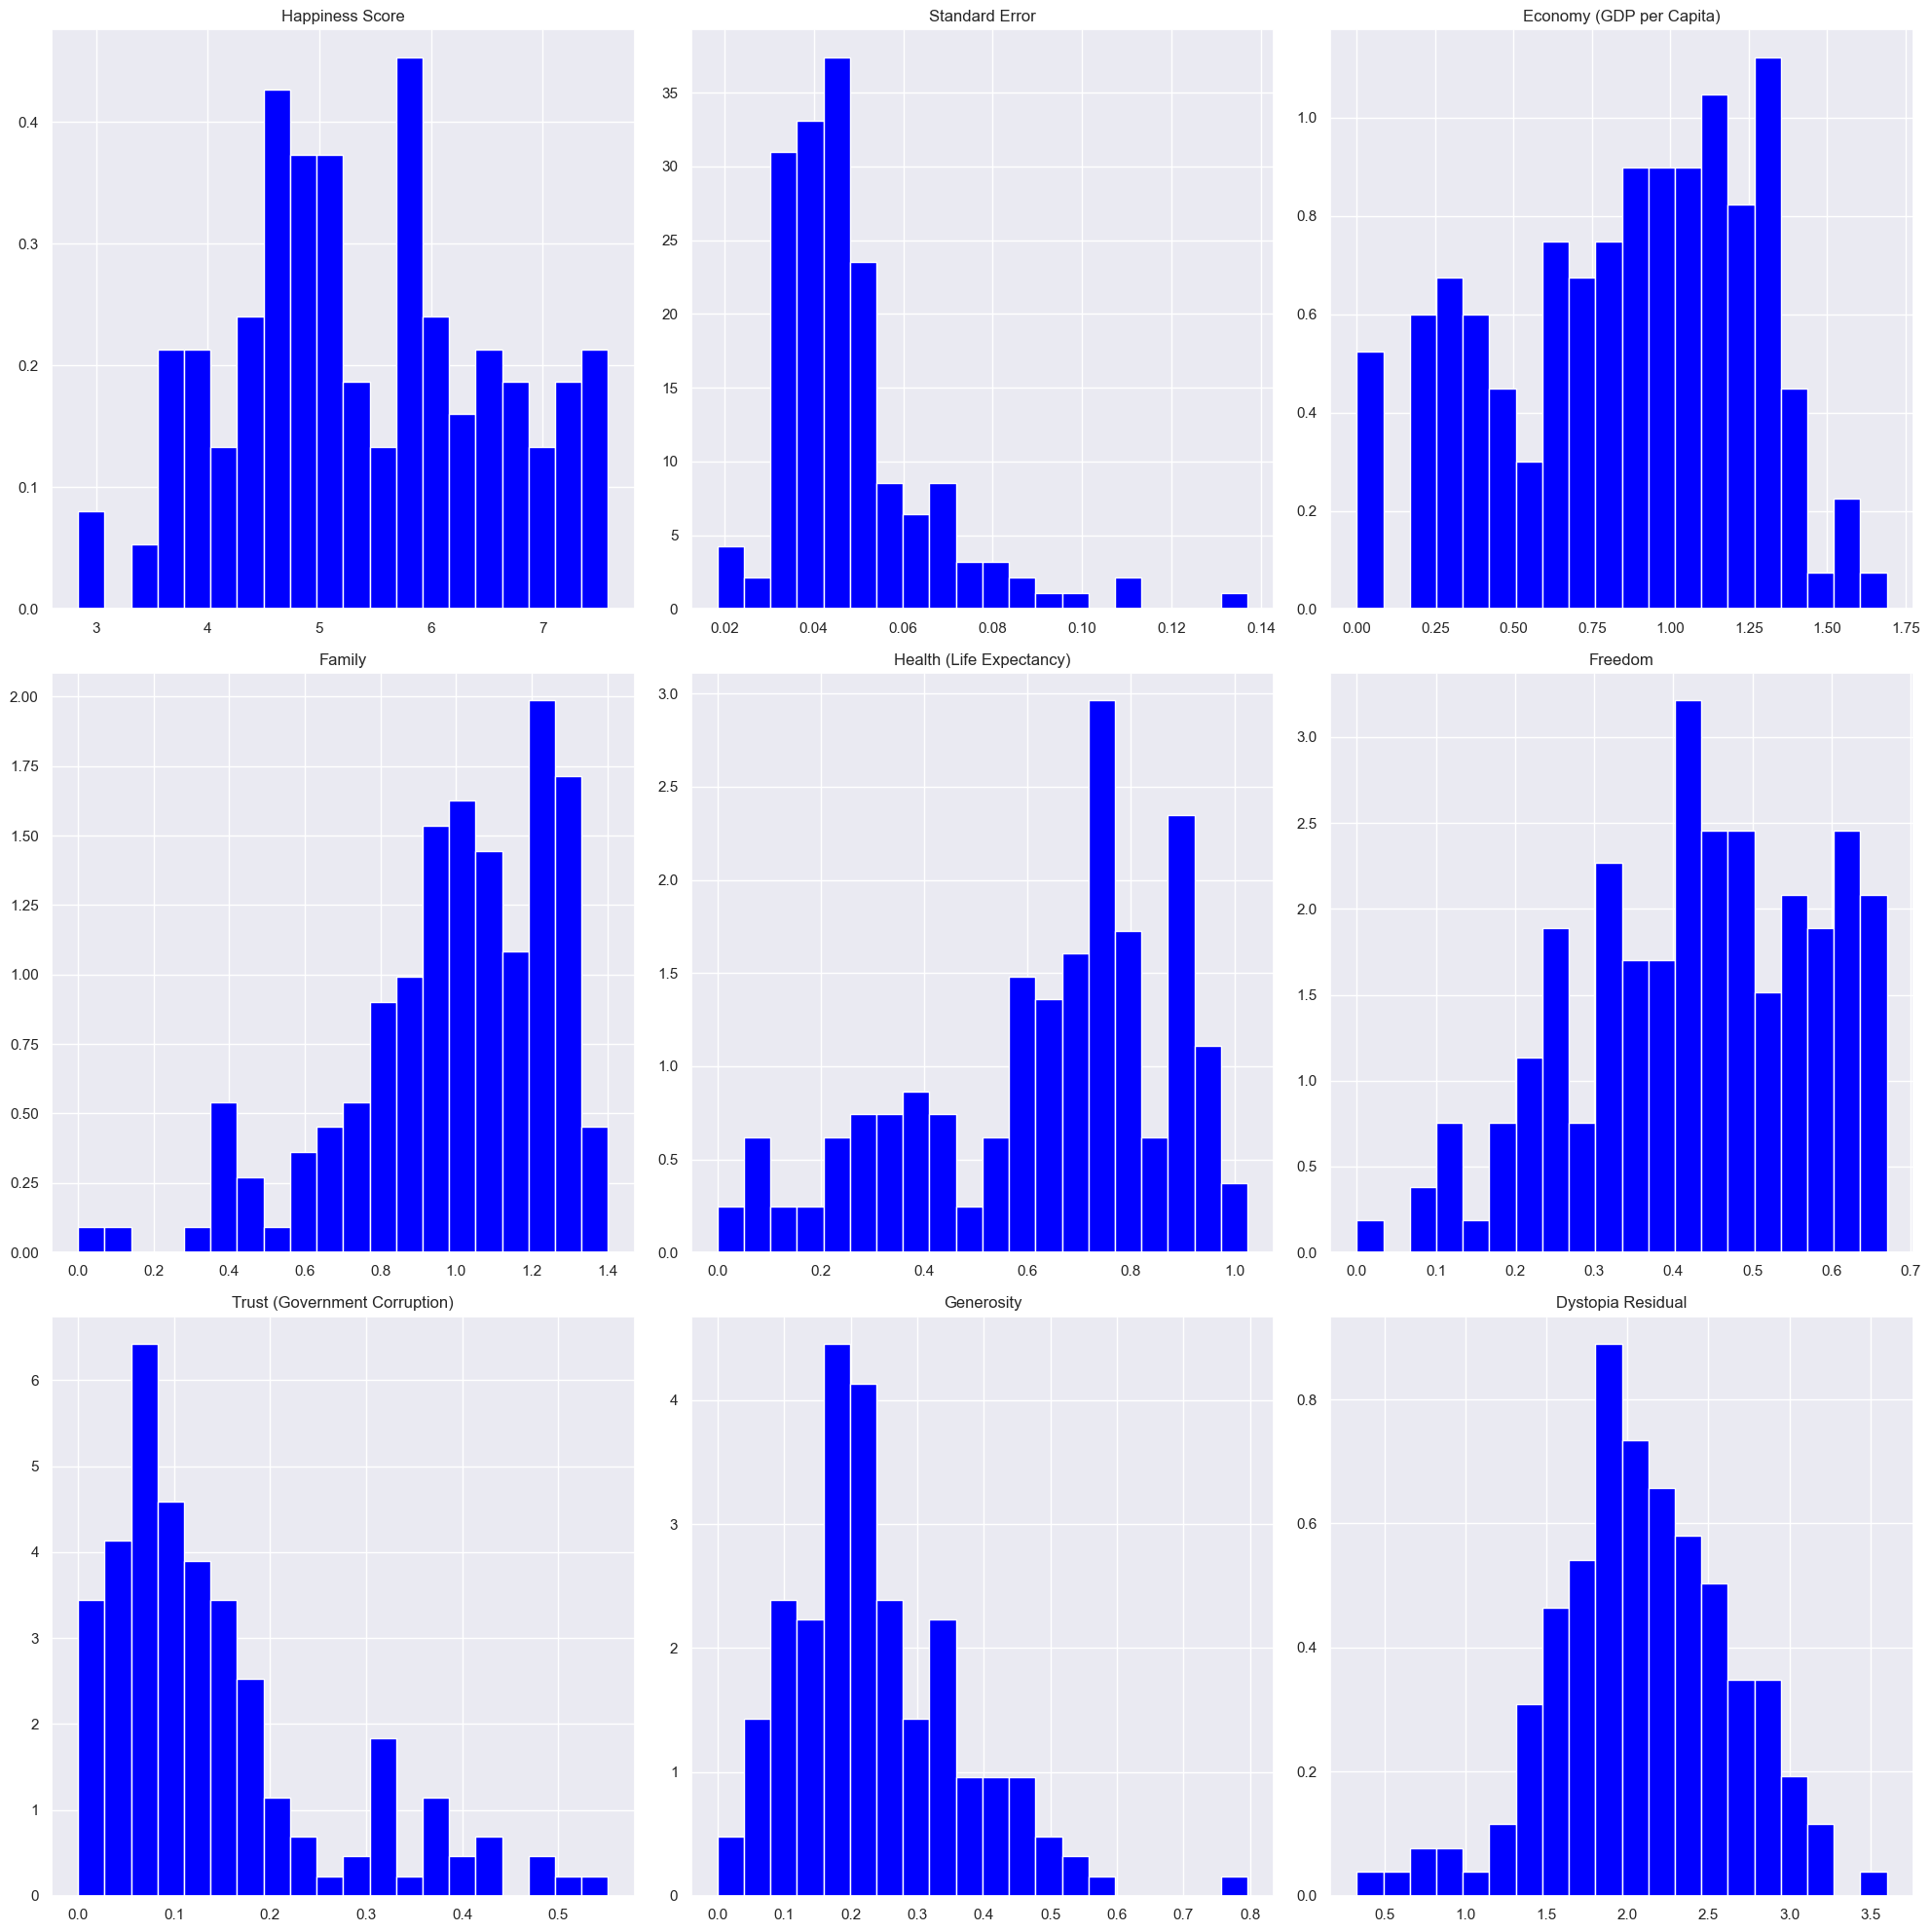

In [19]:
plt.rcParams['figure.figsize']=(20,20)
data1_New.hist(bins=20,color='blue',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

We can observe from the histogram that some of the columns are skewed and not evenly distributed. Using box plot and skew(), we may further establish the presence of skewness.

Happiness Score                     AxesSubplot(0.125,0.747241;0.0945122x0.132759)
Standard Error                   AxesSubplot(0.238415,0.747241;0.0945122x0.132759)
Economy (GDP per Capita)         AxesSubplot(0.351829,0.747241;0.0945122x0.132759)
Family                           AxesSubplot(0.465244,0.747241;0.0945122x0.132759)
Health (Life Expectancy)         AxesSubplot(0.578659,0.747241;0.0945122x0.132759)
Freedom                          AxesSubplot(0.692073,0.747241;0.0945122x0.132759)
Trust (Government Corruption)    AxesSubplot(0.805488,0.747241;0.0945122x0.132759)
Generosity                          AxesSubplot(0.125,0.587931;0.0945122x0.132759)
Dystopia Residual                AxesSubplot(0.238415,0.587931;0.0945122x0.132759)
dtype: object

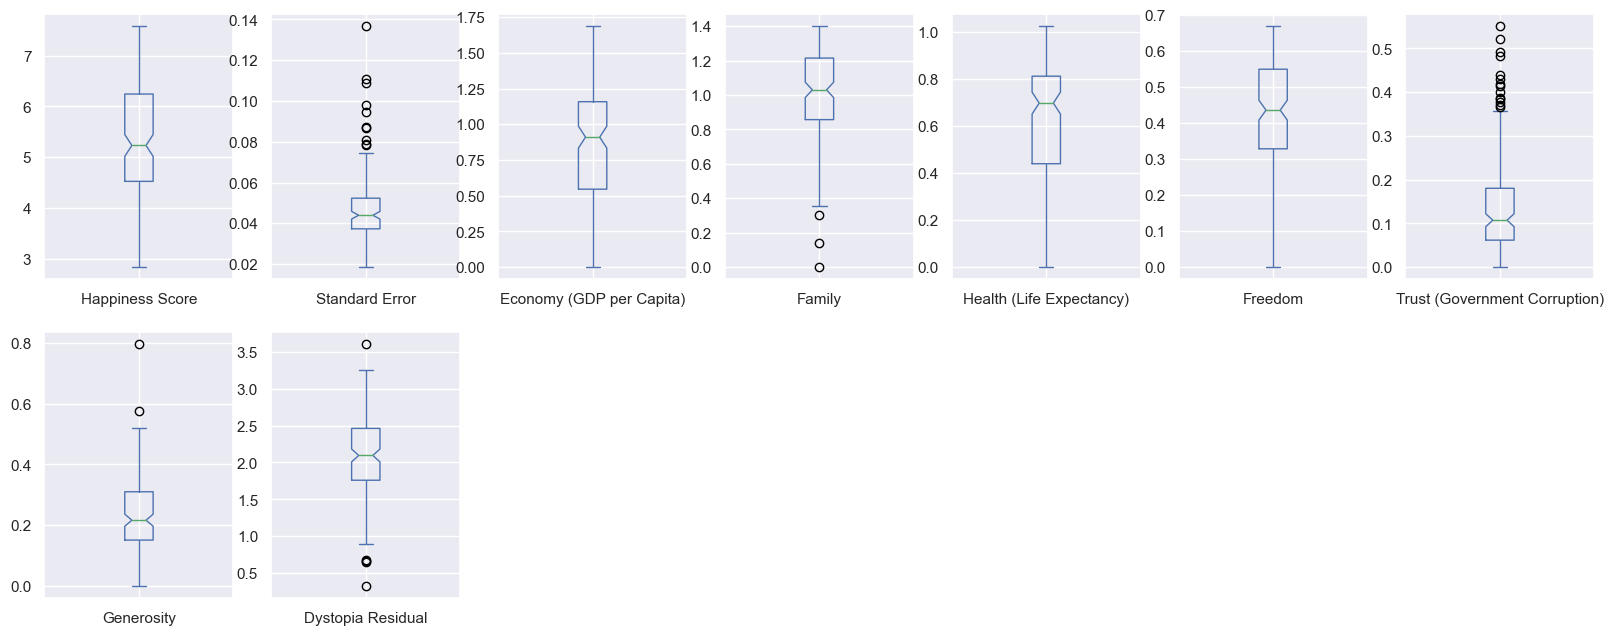

In [20]:
data1_New.plot(kind='box',subplots=True,layout=(5,7),figsize=(20,20),notch=True)

We can plainly observe that skewness is present in the coloumns labelled Standard Error, Trust, Family, Generosity, and Dystopia Residual.

# Using skew() to find Skewness

In [21]:
data1_New.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

We may notice certain columns that are outside the permitted range of -0.5 to 0.5 from the skew() technique. It demonstrates that The data set contains outliers must be dealt with.

# Outlier elimination:

Range of Skewness that is acceptable: -0.5/+0,5

In [23]:
# z Score Method:
z=np.abs(zscore(data1_New))
threshold=3
np.where(z>3)
data1_New1=data1_New[(z<3).all(axis=1)]
data1_New1

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


We were able to identify the outliers using the ZScore Method, and we have eliminated them from our data set.

In [24]:
#The percentage of lost data
data_loss=(158-149)/158*100
data_loss

5.69620253164557

# Dividing the dataset into two variables, 'x' and 'y', for the feature and label

In [25]:
x=data1_New1.drop('Happiness Score',axis=1)# list of all Feature
y=data1_New1['Happiness Score'] # Label

We have now divided the dataset into features and labels for the model's training and testing.

In [26]:
x.shape

(149, 8)

In [27]:
y.shape

(149,)

In [28]:
x.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [29]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

# The scaling

In [30]:
scale1=PowerTransformer(method='yeo-johnson')
x_scaled=pd.DataFrame(scale1.fit_transform(x),columns=x.columns)

In [31]:
x_scaled

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.950337,1.492454,1.658880,1.469636,1.754982,1.817625,0.659579,0.755255
1,0.378562,1.194067,2.009125,1.511292,1.442182,0.329676,1.562604,1.111168
2,-1.041401,1.266612,1.730785,1.053469,1.616037,1.953400,0.977226,0.706495
3,-0.471124,1.695302,1.540248,1.117188,1.791023,1.664359,1.015018,0.655082
4,-0.799032,1.269159,1.487718,1.242549,1.477337,1.541247,1.682150,0.629030
...,...,...,...,...,...,...,...,...
144,0.563000,-1.052662,-1.047195,-1.707662,0.204409,0.681035,-0.131736,-1.339678
145,-0.068119,-1.490349,-0.778550,-1.435893,-0.300343,0.188577,0.012019,-1.249871
146,-1.320810,-1.365216,-2.087389,-1.352388,-1.265395,-0.192843,1.134258,-0.327115
147,-0.692726,-1.433041,-2.010443,-1.309709,0.318123,-0.434498,-0.312080,-0.932164


after applying the Power Transformer scaler, displaying all data

In [32]:
#Creating the Training and Testing data sets:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,train_size=0.75, random_state=42, shuffle=True)

Of the entire data in the dataset, we are using 75% for training purposes and the remaining 25% for testing purposes.

# Machine Learning Regression Model:

In [33]:
# Model choice:
linear_model=LinearRegression()
svr_model=SVR(C=1.0,epsilon=0.2,kernel='poly',gamma='auto')
dtr_model=DecisionTreeRegressor(criterion='poisson',random_state=111)
rfr_model=RandomForestRegressor(max_depth=2,max_features="sqrt")
knr_model=KNeighborsRegressor(n_neighbors=2,algorithm='kd_tree')

We employed the linear regression, support vector regression, decision tree regressor, random forest regressor, and k neighbours regressor as our five regression algorithms. Applied the proper parameters for each of the models using the sklearn website.

In [34]:
# Instruction of the Models:
linear_model.fit(x_train,y_train)
svr_model.fit(x_train,y_train)
dtr_model.fit(x_train,y_train)
rfr_model.fit(x_train,y_train)
knr_model.fit(x_train,y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=2)

In [35]:
#Predicting the models
pred_linear=linear_model.predict(x_test)
pred_svr=svr_model.predict(x_test)
pred_dtr=dtr_model.predict(x_test)
pred_rfr=rfr_model.predict(x_test)
pred_knr=knr_model.predict(x_test)

By giving the model's unseen test features and keeping their values in a predicted variable, we may predict the label after the model has been trained.

# Assessment Metrics

In [36]:
se_linear=mean_squared_error(y_test,pred_linear)
se_svr=mean_squared_error(y_test,pred_svr)
se_dtr=mean_squared_error(y_test,pred_dtr)
se_rfr=mean_squared_error(y_test,pred_rfr)
se_knr=mean_squared_error(y_test,pred_knr)

rmse_linear=sqrt(se_linear)
rmse_svr=sqrt(se_svr)
rmse_dtr=sqrt(se_dtr)
rmse_rfr=sqrt(se_rfr)
rmse_knr=sqrt(se_knr)

print(f"RMSE of Linear Regression is: ", rmse_linear)
print(f"RMSE of Support Vector Regression is: ", rmse_svr)
print(f"RMSE of Decision Tree Regressor is: ", rmse_dtr)
print(f"RMSE of Random Forest Regressor is: ", rmse_rfr)
print(f"RMSE of K Neighbors Regressor is: ", rmse_knr)

RMSE of Linear Regression is:  0.06638458610380135
RMSE of Support Vector Regression is:  0.43020959342150195
RMSE of Decision Tree Regressor is:  0.6827919656974976
RMSE of Random Forest Regressor is:  0.610720679035914
RMSE of K Neighbors Regressor is:  0.34579756208997253


To compare the differences between the actual label and the anticipated label, we utilised Root Mean Squared Error.A lower RMSE is always preferable than a greater one.

In [37]:
#R2 Score for the model:

print(f"R2 Score for Linear Regression is:",r2_score(y_test,pred_linear,multioutput='variance_weighted')*100)
print(f"R2 Score for Support Vector Regression is:",r2_score(y_test,pred_svr,multioutput='variance_weighted')*100)
print(f"R2 Score for Decision Tree Regressor  is:",r2_score(y_test,pred_dtr,multioutput='variance_weighted')*100)
print(f"R2 Score for Random Forest Regressor  is:",r2_score(y_test,pred_rfr,multioutput='variance_weighted')*100)
print(f"R2 Score for K Neighbors Regressor  is:",r2_score(y_test,pred_knr,multioutput='variance_weighted')*100)

R2 Score for Linear Regression is: 99.61289492395045
R2 Score for Support Vector Regression is: 83.74247075798078
R2 Score for Decision Tree Regressor  is: 59.04837243238613
R2 Score for Random Forest Regressor  is: 67.23730540613137
R2 Score for K Neighbors Regressor  is: 89.49639897867345


In order to assess the model and determine its correctness and choose the optimal regression model, we utilise the R2 score.

By comparing the RMSE and R2 scores of the five regression algorithms, we can see that the linear regression model has the highest R2 score and the lowest RMSE, proving it to be the best of the bunch.


In [38]:
#The best ML model's hyper parameter tuning:
Lr_Param={'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'n_jobs':[1,2,3,4,5,6,7,8,9,10]}

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
GSCV=GridSearchCV(LinearRegression(),Lr_Param,cv=5)

In [41]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'normalize': [True, False]})

In [42]:
GSCV.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': True}

In [43]:
Final_model=LinearRegression(copy_X=True,fit_intercept=True, n_jobs=1, normalize=True)
CLassifer=Final_model.fit(x_train,y_train)
lr_pred=Final_model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Final Model is:", lr_r2_score*100)

R2 score for the Final Model is: 99.61289492395045


# Model saving (using pickle or joblib):

In [45]:
filename='FinalModel_Happiness.pkl'
pickle.dump(Final_model,open(filename,'wb'))

With the aid of the pickle approach, we have stored our final model.

# The Model Loading:

In [46]:
load_model=pickle.load(open(filename,'rb'))
result=load_model.score(x_test,y_test)*100
print(result)

99.61289492395045


In order to forecast the model score, I eventually imported the saved model and passed the unknown data set.

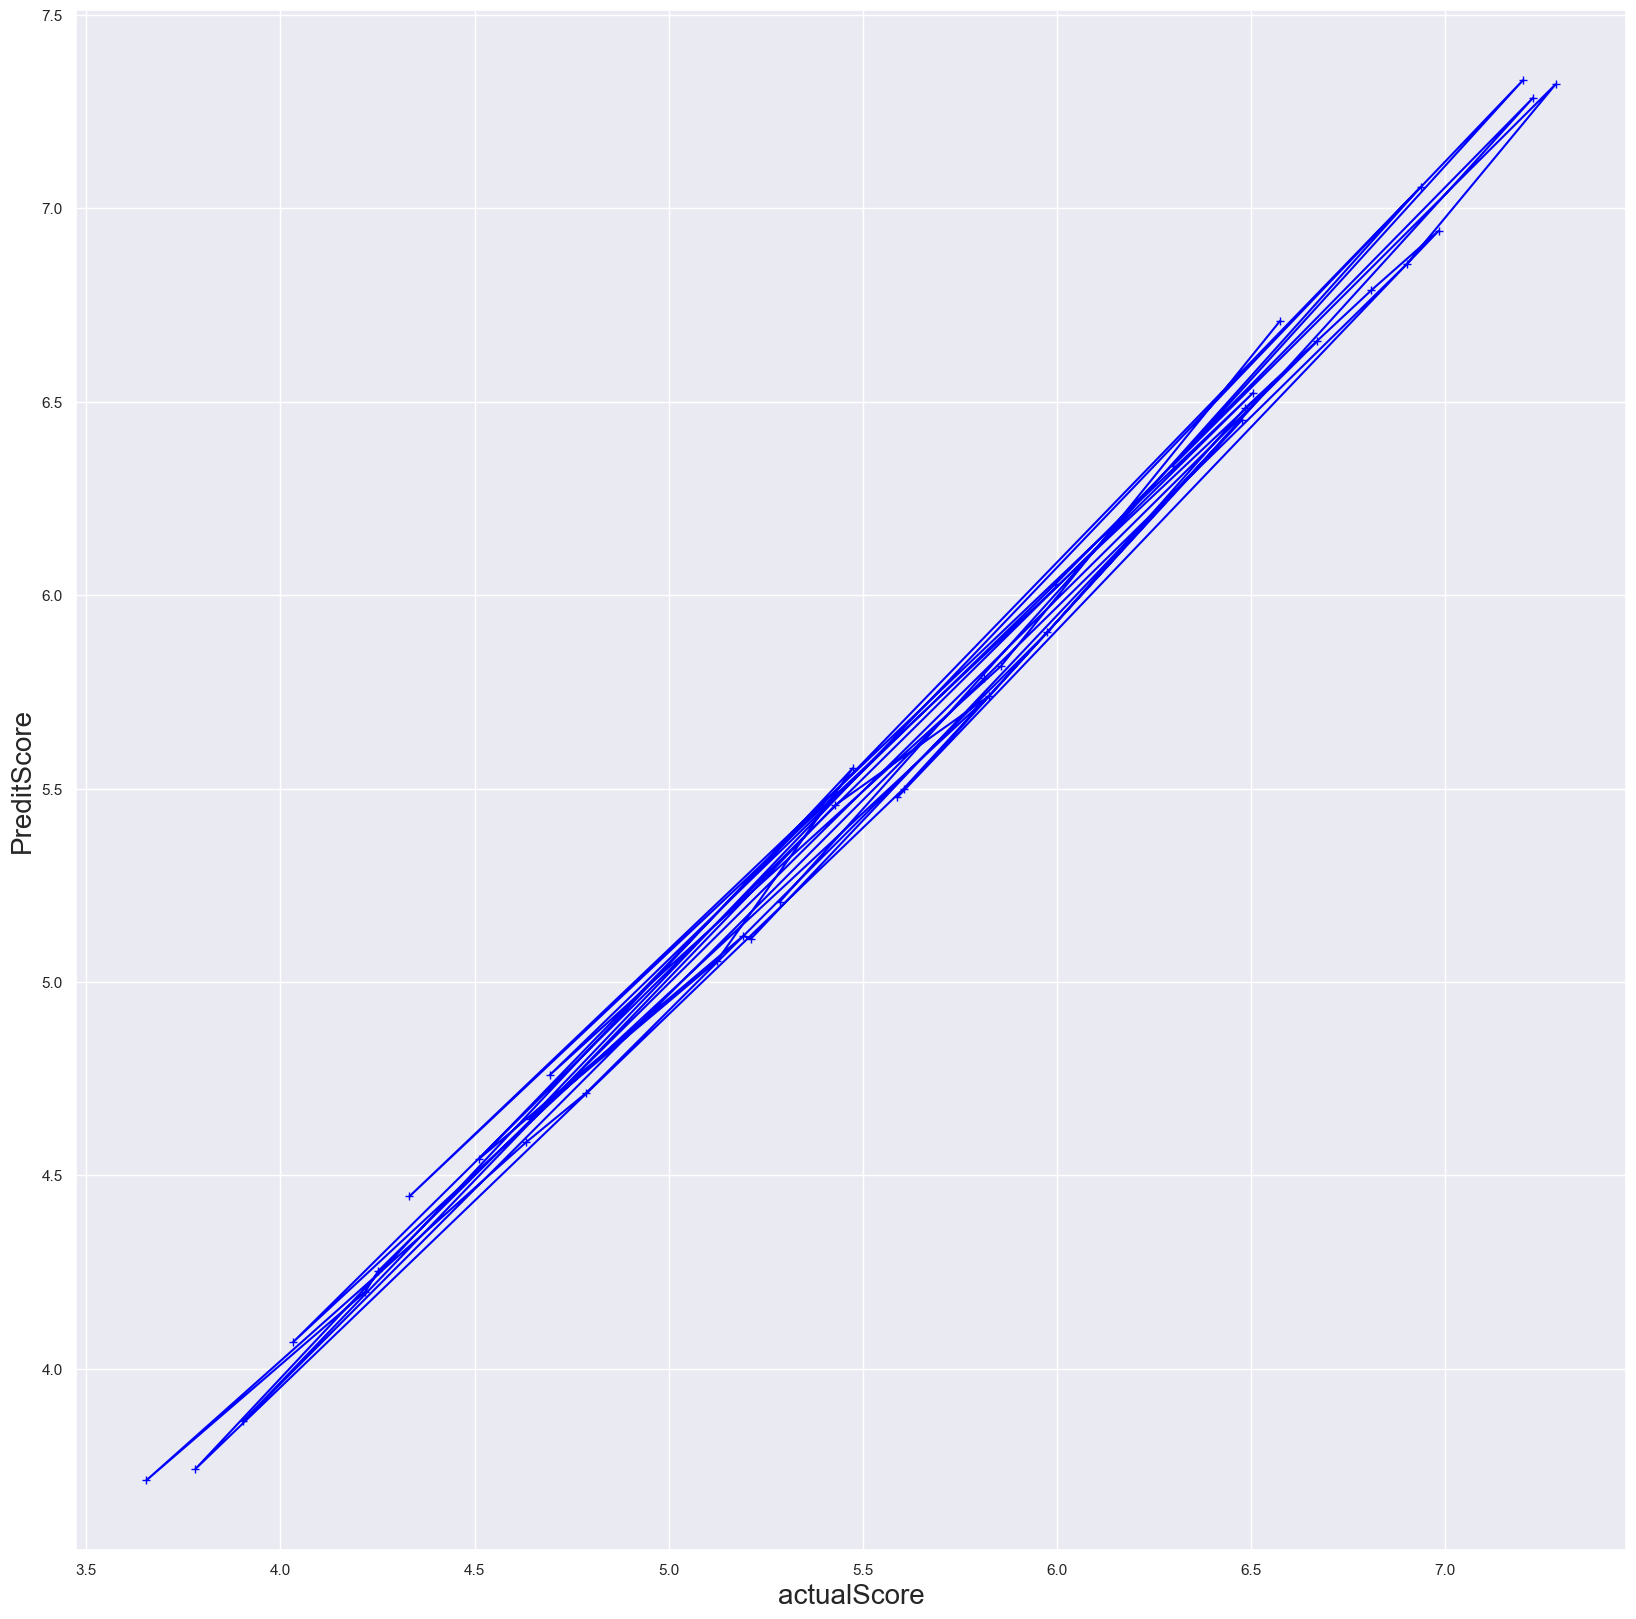

In [47]:
plt.xlabel('actualScore',fontsize=20)
plt.ylabel('PreditScore',fontsize=20)
plt.plot(y_test,lr_pred,color='blue',marker='+')
plt.show()

# Bringing the dataset

Using the type and shape parameters, the dataset's vital statistics

In [2]:
data2=pd.read_csv("happiness_score_dataset.csv")


print("Data type : ", type(data2))
print("Data dims : ", data2.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (158, 12)


In [3]:
# Get a summary of the information
data2.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
# details regarding the variables
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# Data analysis and visualisation that is exploratory

In [5]:
#the dataframe's required variables can be extracted
extracts = ["Country", "Happiness Score", "Economy (GDP per Capita)","Health (Life Expectancy)", \
            "Family", "Freedom", \
            "Generosity", "Trust (Government Corruption)"]

data = pd.DataFrame(data2[extracts])

In [6]:
# To make the dataframe's columns simpler to understand, rename them.
data.rename(columns = {'Economy (GDP per Capita)': 'GDP_PER_PERSON'}, inplace = True)
data.rename(columns = {'Freedom': 'FREEDOM'}, inplace = True)
data.rename(columns = {'Health (Life Expectancy)': 'HEALTHY_LIFE_EXPECTANCY'}, inplace = True)
data.rename(columns = {'Family': 'SOCIAL_SUPPORT'}, inplace = True)
data.rename(columns = {'Generosity': 'GENEROSITY'}, inplace = True)
data.rename(columns = {'Trust (Government Corruption)': 'PERCEPTIONS_OF_CORRUPTION'}, inplace = True)

In [7]:
#Remove any duplicate columns.
data = data.loc[:,~data.columns.duplicated()]
data.head()

,Country,Happiness Score,GDP_PER_PERSON,HEALTHY_LIFE_EXPECTANCY,SOCIAL_SUPPORT,FREEDOM,GENEROSITY,PERCEPTIONS_OF_CORRUPTION
0,Switzerland,7.587,1.39651,0.94143,1.34951,0.66557,0.29678,0.41978
1,Iceland,7.561,1.30232,0.94784,1.40223,0.62877,0.43630,0.14145
2,Denmark,7.527,1.32548,0.87464,1.36058,0.64938,0.34139,0.48357
3,Norway,7.522,1.45900,0.88521,1.33095,0.66973,0.34699,0.36503
4,Canada,7.427,1.32629,0.90563,1.32261,0.63297,0.45811,0.32957


Summary of the dataset

COUNTRY : Each country's name
    
HAPPINESS_SCORE :a statistic that was calculated by asking the sampled population to rate their level of happiness on a scale of 0 to 10, with 10 being the happiest.
    
GDP_PER_PERSON : Each nation's purchasing power parity (PPP)-based GDP per capita (in USD)
    
HEALTHY_LIFE_EXPECTANCY : On the basis of information from the World Health Organisation (WHO) and the WDI, healthy life expectancies at birth are calculated.
    
SOCIAL_SUPPORT : The question's binary responses, which can only be 0 or 1, on a national scale Do you have family or friends you can depend on to lend a hand whenever you need it or not if you find yourself in trouble?
    
FREEDOM :Average national binary answers to the query Are you happy or unhappy that you have the freedom to decide what you want to do with your life?
    
GENEROSITY : The residual after regressing the average of all responses to the question, "Have you given money to a charity in the last month?" is generosity. on the per-capita GDP.
    
PERCEPTIONS_OF_CORRUPTION : The average of the binary responses to the following two GWP questions: "Is corruption pervasive throughout the government or not?" and "Is business corruption pervasive or not?

In [8]:
data1 = dict(type = 'choropleth', 
           locations = data['Country'],
           locationmode = 'country names',
           z = data['Happiness Score'], 
           text = data['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Index 2018', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap3 = go.Figure(data = [data1], layout=layout)
iplot(choromap3)

In [9]:
# Eliminating the rows containing empty values.
data = data.dropna(how='any',axis=0)

# Reset the index after eliminating any missing values.
data = data.reset_index(drop=True)

In [10]:
#Statistics in Brief for All Variables
data.describe().round(2)

,Happiness Score,GDP_PER_PERSON,HEALTHY_LIFE_EXPECTANCY,SOCIAL_SUPPORT,FREEDOM,GENEROSITY,PERCEPTIONS_OF_CORRUPTION
count,158.00,158.00,158.00,158.00,158.00,158.00,158.00
mean,5.38,0.85,0.63,0.99,0.43,0.24,0.14
std,1.15,0.40,0.25,0.27,0.15,0.13,0.12
min,2.84,0.00,0.00,0.00,0.00,0.00,0.00
25%,4.53,0.55,0.44,0.86,0.33,0.15,0.06
50%,5.23,0.91,0.70,1.03,0.44,0.22,0.11
75%,6.24,1.16,0.81,1.21,0.55,0.31,0.18
max,7.59,1.69,1.03,1.40,0.67,0.80,0.55


In [11]:
# Creating a full correlation matrix.
data.corr().round(2)

,Happiness Score,GDP_PER_PERSON,HEALTHY_LIFE_EXPECTANCY,SOCIAL_SUPPORT,FREEDOM,GENEROSITY,PERCEPTIONS_OF_CORRUPTION
Happiness Score,1.00,0.78,0.72,0.74,0.57,0.18,0.40
GDP_PER_PERSON,0.78,1.00,0.82,0.65,0.37,-0.01,0.31
HEALTHY_LIFE_EXPECTANCY,0.72,0.82,1.00,0.53,0.36,0.11,0.25
SOCIAL_SUPPORT,0.74,0.65,0.53,1.00,0.44,0.09,0.21
FREEDOM,0.57,0.37,0.36,0.44,1.00,0.37,0.49
GENEROSITY,0.18,-0.01,0.11,0.09,0.37,1.00,0.28
PERCEPTIONS_OF_CORRUPTION,0.40,0.31,0.25,0.21,0.49,0.28,1.00


<AxesSubplot:>

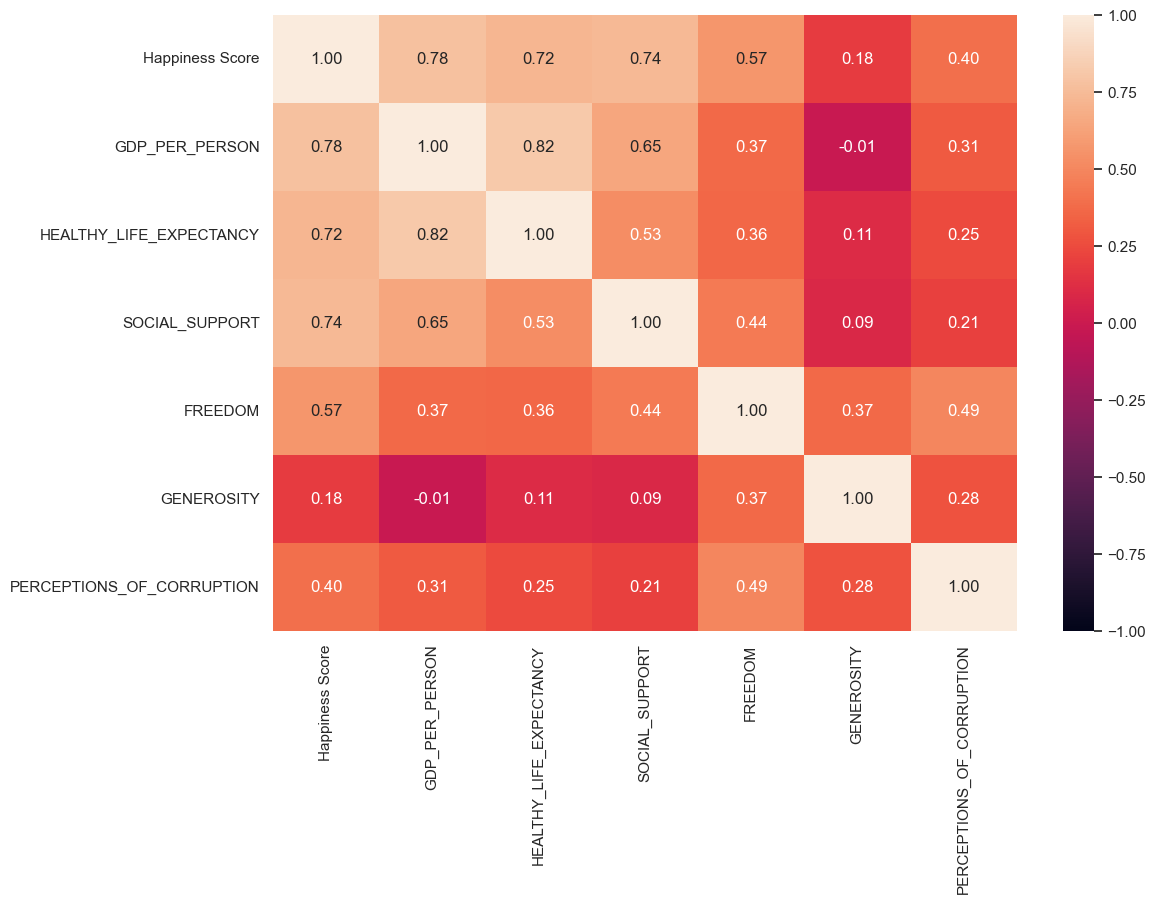

In [12]:
#The correlation matrix's heatmap
f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

# The main elements that influence happiness or if there are any inaccurate perceptions of happiness

In [13]:
# Figure representing the Happiness Score
happiness_score = pd.DataFrame(data["Happiness Score"])
happiness_score.describe().round(2)

,Happiness Score
count,158.00
mean,5.38
std,1.15
min,2.84
25%,4.53
50%,5.23
75%,6.24
max,7.59


# Happiness Score variable in a single-variable plot

<AxesSubplot:ylabel='Density'>

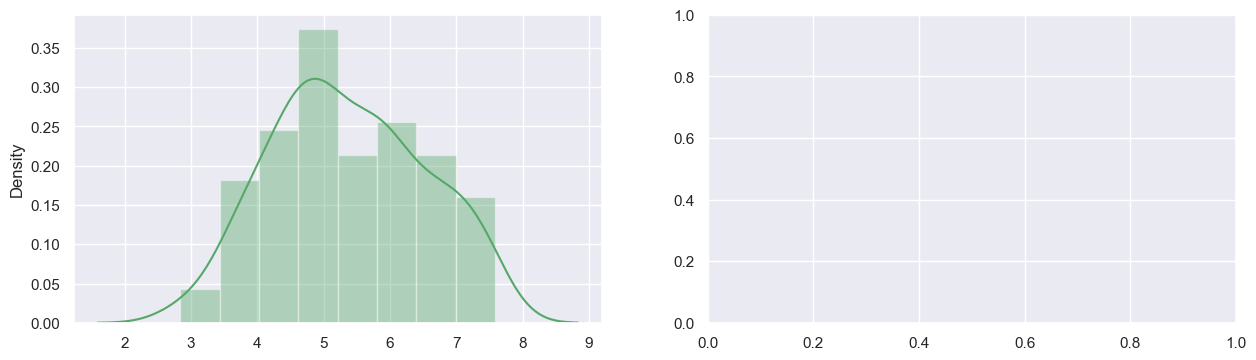

In [14]:
f,axes = plt.subplots(1,2,figsize=(15,4))
sb.distplot(happiness_score,kde=True,hist=True,color="g",ax=axes[0])

# Let's use the Univariate Plots to divide the Happiness Score into three groups:

In [15]:
# Filling out the Happiness_Score dataframe with our Happiness Category.
happiness=[]
for i in happiness_score["Happiness Score"]:
    if i<4:
        happiness.append("SAD")
    elif 4<=i<=6:
        happiness.append("NORMAL")
    else:
        happiness.append("HAPPY")


#Adding to our main dataframe  the happiness score dataframe
pred_happiness = pd.DataFrame(happiness,columns=["PREDICTED_HAPPINESS"])
pred_happiness = pd.DataFrame(pred_happiness["PREDICTED_HAPPINESS"].astype('category'))
data = pd.concat([data,pred_happiness],axis=1)

In [16]:
# Deleting any redundant columns, if any.
data = data.loc[:,~data.columns.duplicated()]
data.head()

,Country,Happiness Score,GDP_PER_PERSON,HEALTHY_LIFE_EXPECTANCY,SOCIAL_SUPPORT,FREEDOM,GENEROSITY,PERCEPTIONS_OF_CORRUPTION,PREDICTED_HAPPINESS
0,Switzerland,7.587,1.39651,0.94143,1.34951,0.66557,0.29678,0.41978,HAPPY
1,Iceland,7.561,1.30232,0.94784,1.40223,0.62877,0.43630,0.14145,HAPPY
2,Denmark,7.527,1.32548,0.87464,1.36058,0.64938,0.34139,0.48357,HAPPY
3,Norway,7.522,1.45900,0.88521,1.33095,0.66973,0.34699,0.36503,HAPPY
4,Canada,7.427,1.32629,0.90563,1.32261,0.63297,0.45811,0.32957,HAPPY


# Happiness Index based on our classification

In [17]:
data["PREDICTED_HAPPINESS"].value_counts()

NORMAL    93
HAPPY     44
SAD       21
Name: PREDICTED_HAPPINESS, dtype: int64

# Making an image of our happiness category

We can see that most nations fall into the Normal Category because they are neither Happy nor sad.

Text(0, 0.5, 'Number of Countries')

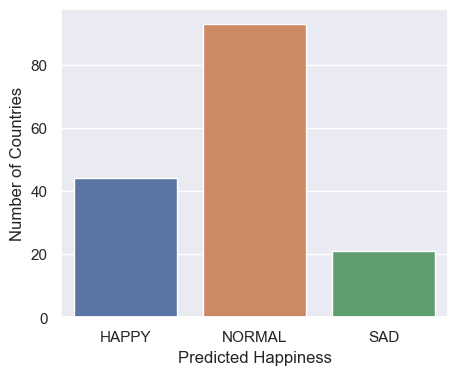

In [18]:
f, axes = plt.subplots(1, 1, figsize=(5, 4))
sb.countplot(data["PREDICTED_HAPPINESS"])
plt.xlabel("Predicted Happiness")
plt.ylabel("Number of Countries")

# Distribution of all factors across the various happiness categories

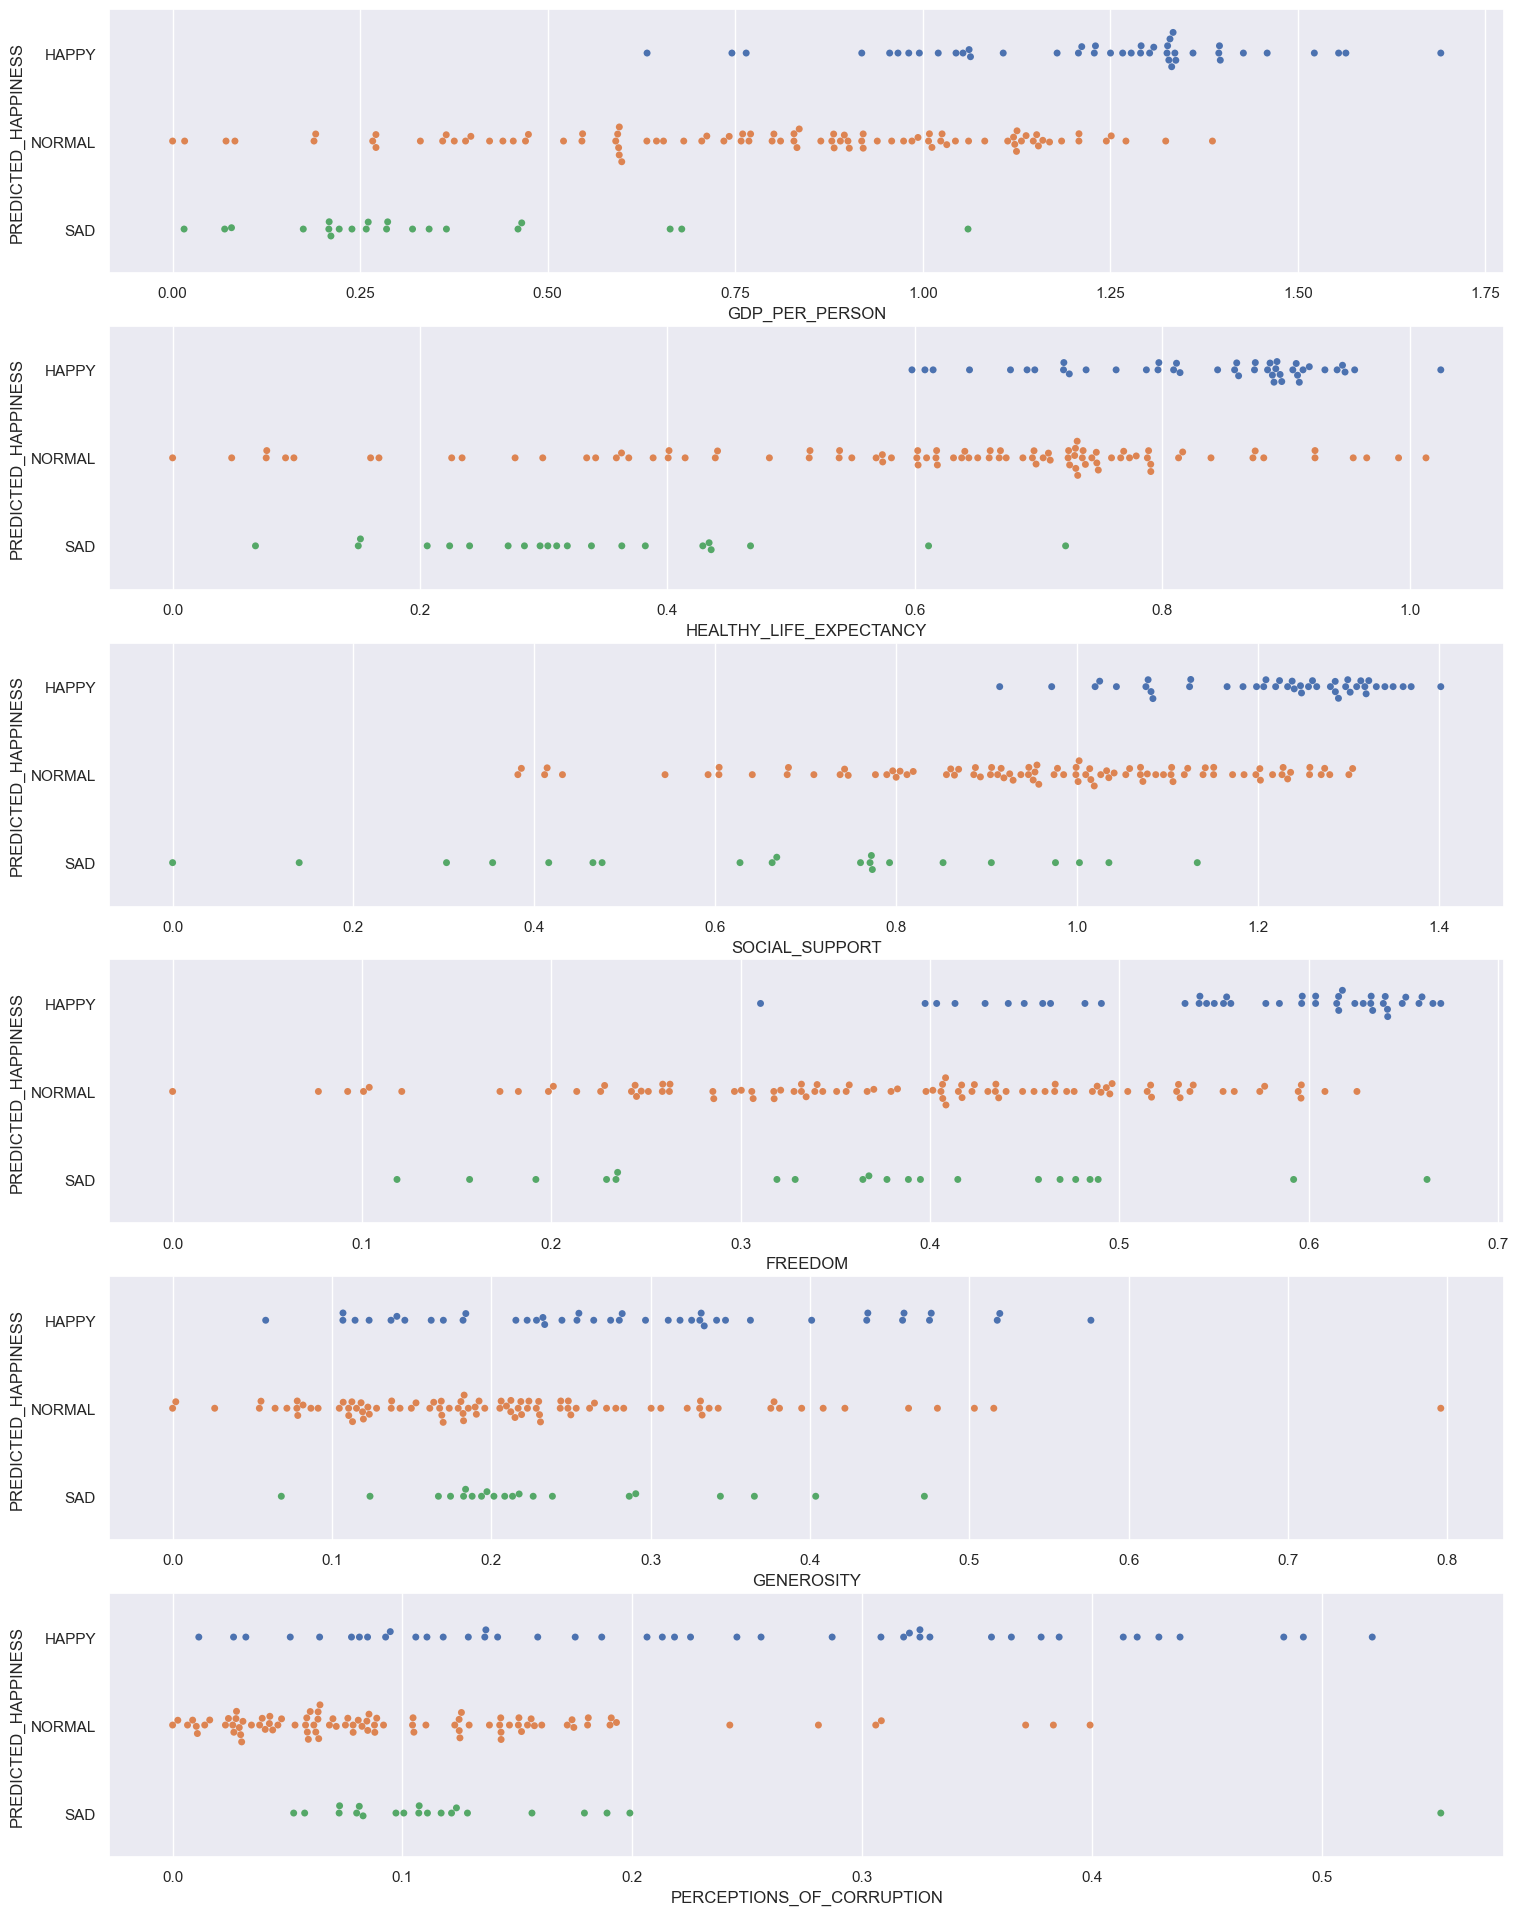

In [19]:
# Swarm diagram for every parameter
predictors=["GDP_PER_PERSON","HEALTHY_LIFE_EXPECTANCY","SOCIAL_SUPPORT","FREEDOM","GENEROSITY","PERCEPTIONS_OF_CORRUPTION"]
f,axes=plt.subplots(6,1,figsize=(18,24))
count=0
for var in predictors:
    sb.swarmplot(x=var,y="PREDICTED_HAPPINESS",data=data,orient="h",ax=axes[count])
    count+=1

# First observation

Order of Variables' Importance in Predicting Happiness

GDP

Life Expectancy

Social Support

Generosity

Corruption

Freedom of Life

Most Important: 1, Least Important: 7, etc.

# 2nd observation

# Inferences Towards Happiness


The Swarm plot is the most challenging to classify. The heat-map (shown above) in Exploratory Data Analysis / Visualisation illustrates the same finding, which is that there is little correlation between Happiness Score and Perception of Corruption.

Contrary to popular belief, corruption has the least impact on a country's residents' happiness at the individual level and is therefore least significant for the growth and economy of that country. This conclusion may be drawn from the order of the variables listed above.

# Predicting the Happiness Category by utilising the dataset's Random Forest Classifier method

In [20]:
# The World Happiness Dataset is recalled.
predictors=["GDP_PER_PERSON","HEALTHY_LIFE_EXPECTANCY","SOCIAL_SUPPORT","GENEROSITY"]
x=pd.DataFrame(data[predictors])
y=pd.DataFrame(data["PREDICTED_HAPPINESS"])

# Dividing the dataset into Train and Test with a 0.25-person test size.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state = 42)

# Constructing a Random Forest Classifier.
forest = RandomForestClassifier(n_estimators = 80, random_state = 42, max_depth = 10, min_samples_split = 0.1, min_samples_leaf = 0.001)
forest.fit(x_train,y_train)

# Utilise a Random Forest Classifier for Predicting Happiness
y_train_pred_forest=forest.predict(x_train)
y_test_pred_forest=forest.predict(x_test)

# Verify the quality of fit using the Random Forest Classifier.
print("Using a Random Forest Classifier, assessing the fit:")
print("\tThe prediction accuracy on Train set: ",round(forest.score(x_train,y_train),2))
print("\tThe prediction accuracy on Test set: ",round(forest.score(x_test,y_test), 2))
print()

Using a Random Forest Classifier, assessing the fit:
	The prediction accuracy on Train set:  0.88
	The prediction accuracy on Test set:  0.68



We can infer the Random Forest Classifier algorithm's high power from the values of Goodness of fit. On the test data, we may get an accuracy of up to 75%.

# Predicting the most comparable Country by training the dataset with the linear regression algorithm

In [21]:
# Getting X_train, X_test, Y_train, and Y_test ready.
X = data[["GDP_PER_PERSON", "HEALTHY_LIFE_EXPECTANCY", "SOCIAL_SUPPORT", "GENEROSITY"]]
y = data["Happiness Score"]
scaler = StandardScaler()
scaler.fit(X)
X_standard = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.2, random_state=10)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print("Training set R^2:", linreg.score(X_train, y_train))
print("Test set R^2:", linreg.score(X_test, y_test))

Training set R^2: 0.7421406667632537
Test set R^2: 0.7398530750525318


The accuracy of the Linear Regression Algorithm on the test data is 75%, as can be seen from the values of R2.

# Ascertaining our country's happiness category and Determining the nation that is most like our own.

In [22]:
print()

name = input("Please give your country's name: ")

print("--------------------------------")

print("Let's examine whether [Happiness Category/Score] is feasible for", name, "by adding a few significant characteristics: ")

print()
print("--------------------------------")
print()

print("Citation: Singapore's GDP per capita is $81,000, the average for all countries is $17,000")
while True:
    try:
        gdp = float(input("the average GDP per person in your country, expressed in USD: "))
        break
    except ValueError:
        print("Please provide a true input.")
        print()

print()
print("--------------------------------")
print()

while True:
    try:
        life_expectancy = float(input("Type in your citizens' average life expectancy: (Age) "))
        break
    except ValueError:
        print("Enter a legitimate input only.")
        print()

print()
print("--------------------------------")
print()

print("Community Care - Would your loved ones be able to offer assistance you in an hour of need?")

while True:
    try:
        social_support=float(input("Enter the Social Support Index (where 0 represents the lowest support and 1 represents the highest support): "))
        break
    except ValueError:
        print("Enter a legitimate input only.")
        print()

print()
print("--------------------------------")
print()

print("Kind heartedness: In the last month, have you volunteered to any institutions?")

while True:
    try:
        generosity =float(input("How kind-hearted are people in your nation? (Select 0 or 1, 0 being the lowest; 1 being the highest): "))
        break
    except ValueError:
        print("Enter a legitimate input only.")
        print()

print()
print("--------------------------------")
print()

# Making a new dataframe for user-provided information.
new_country = {"GDP_PER_PERSON": [gdp] ,"HEALTHY_LIFE_EXPECTANCY": [life_expectancy] ,"SOCIAL_SUPPORT": [social_support] \
              ,"GENEROSITY": [generosity]}
new_country = pd.DataFrame(new_country)

#predicting the type of happiness based on user input
y_prob = forest.predict_proba(new_country)

# Putting the various probabilities into variables
y_prob1 = pd.DataFrame(list(y_prob[:,0])[0],columns=["Probability Happy"],index=new_country.index)
y_prob2 = pd.DataFrame(list(y_prob[:,1])[0],columns=["Probability Normal"],index=new_country.index)
y_prob3 = pd.DataFrame(list(y_prob[:,2])[0],columns=["Probability sad"],index=new_country.index)


# Putting expected probabilities in a dataframe.
data_comb = pd.concat([new_country, y_prob1, y_prob2, y_prob3], axis=1)

# Remove the probability.
happy = list(y_prob[:,0])[0]
normal = list(y_prob[:,1])[0]
sad = list(y_prob[:,2])[0]

print()


def find_nearest_country(gdp, hle, scl):
    def calculate_distance(x, gdp, hle, scl):
        gdp_dif = np.log((x["GDP_PER_PERSON"] - gdp)**2)
        hle_dif = np.log((x["HEALTHY_LIFE_EXPECTANCY"] - hle)**2)
        scl_dif = np.log((x["SOCIAL_SUPPORT"] - scl)**2)
        return gdp_dif + hle_dif + scl_dif
    
    #Obtaining the data we need to use graphs and the training model.
    data1 = data[["Country", "GDP_PER_PERSON", "HEALTHY_LIFE_EXPECTANCY","SOCIAL_SUPPORT"]]
    data1['distances'] = data1.apply(lambda x: calculate_distance(x, gdp, hle, scl), axis=1)
    index = data1['distances'].values.argmin()
    found = data1.iloc[index, :]
    min_distance = data1['distances'].min()
    
    
    # examining how the graph differs from our data by plotting it.
    # entire data
    text1 = data[['Country','GDP_PER_PERSON']].apply(lambda x: "{}, {:.3f}".format(x[0], x[1]), axis=1)
    trace0 = go.Scatter(
        x = data1['SOCIAL_SUPPORT'],
        y = data1['HEALTHY_LIFE_EXPECTANCY'],
        text = text1,
        mode='markers',
        marker=dict(
            size = data['GDP_PER_PERSON'].apply(lambda x: x**0.4)
        ),
        showlegend=False
    )
    # Our own country
    trace1 = go.Scatter(
        x = [scl],
        y = [hle],
        text = "Your country",
        mode = 'markers',
        marker = dict (
            size = [gdp**0.4],
            color='rgb(255, 0, 0)'
        ),
        showlegend=False
    )
    
    # Country comparable to our own country
    trace2 = go.Scatter(
        
        x = [found['SOCIAL_SUPPORT']],
        y = [found['HEALTHY_LIFE_EXPECTANCY']],
        text = found['Country'],
        mode='markers',
        marker=dict(
            size = [np.exp(found['GDP_PER_PERSON'])**0.4],
            color = 'rgb(255, 255, 0)'
        ),
        showlegend=False
    )
    
    # design
    layout = go.Layout(
    title=go.layout.Title(
        text='Find your country',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Social Support',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Healthy Life Expectancy',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)
    
    graph = [trace0, trace1, trace2]
    fig = go.Figure(data=graph, layout=layout)
    py.iplot(fig, filename='abc')
    
    print()
    print("--------------------------------")
    print()
    print("Legend:")
    print('Red:    Your Nation (Virtual Nation)')
    print('Yellow: The nation that is most like your own (your actual nation).')
    print()
    print("--------------------------------")
    print()

    return found, min_distance

def program():
    hle = life_expectancy       # expectancy of a healthy life
    scl = social_support       # family support
    choice = 0

    # Locating the country on the map.
    found_data, min_distance = find_nearest_country(gdp, hle, scl)
    if min_distance >= 30:
        print(min_distance)
        print("Your inputs appear a little odd. They might need to be modified.")
    else:
        print()
        print("--------------------------------")
        print()
        print("{} is the nation that most closely resembles your own.".format(found_data[0]))
        print()
        print("--------------------------------")
        print()


#Deciding on the most likely candidate.
if (normal > happy and normal > sad):
    print("Your nation can improve! We may state that the residents of", name, \
          "will probably be happy or ordinary, with a chance of", round(normal*100, 2), "%")
elif (happy > normal and happy > sad):
    print("Congrats! We can assert that the people of", name, "will BE HAPPY and there is a chance that", round(happy*100, 2), "%")
else:
    print("Oh No! We can assert that the people of", name, "will be DISAPPOINTED with a likelihood of", round(sad*100, 2), "%")
    
print()
print("--------------------------------")
print()

program()


Please give your country's name: India
--------------------------------
Let's examine whether [Happiness Category/Score] is feasible for India by adding a few significant characteristics: 

--------------------------------

Citation: Singapore's GDP per capita is $81,000, the average for all countries is $17,000
the average GDP per person in your country, expressed in USD: 64499

--------------------------------

Type in your citizens' average life expectancy: (Age) 52

--------------------------------

Community Care - Would your loved ones be able to offer assistance you in an hour of need?
Enter the Social Support Index (where 0 represents the lowest support and 1 represents the highest support): 1

--------------------------------

Kind heartedness: In the last month, have you volunteered to any institutions?
How kind-hearted are people in your nation? (Select 0 or 1, 0 being the lowest; 1 being the highest): 1

--------------------------------


Congrats! We can assert that the p


--------------------------------

Legend:
Red:    Your Nation (Virtual Nation)
Yellow: The nation that is most like your own (your actual nation).

--------------------------------


--------------------------------

Ecuador is the nation that most closely resembles your own.

--------------------------------

